In [1]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

In [16]:
sea_level = pd.read_csv('./data/sealevel.csv') # 해수면 관련 데이터 읽어들이기
sea_group = sea_level.groupby('Year').mean() # 월별로 있는 데이터 년도별로 묶은 후 반영
sea_group.head()

,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
Year,,,,,,,,
1993,319044.908649,-34.605405,87.603784,-34.629459,-34.483784,87.607027,-34.507568,-34.508378
1994,323836.882162,-30.951081,87.412432,-30.898919,-30.584324,87.418919,-30.532432,-30.531892
1995,317986.154865,-28.645946,85.336757,-27.971351,-28.019459,85.337838,-27.359189,-27.358108
1996,323979.240278,-26.596389,84.194444,-26.140833,-25.744167,84.188611,-25.288611,-25.287222
1997,321345.634054,-22.682432,97.989189,-22.345946,-21.591081,98.000000,-21.254865,-21.255676


In [29]:
sea_difference = sea_group[['SmoothedGSML_GIA_sigremoved']]
sea_difference = sea_difference.rename(columns = {'SmoothedGSML_GIA_sigremoved' : '20년간 평균과의 차이(mm)'})
sea_difference.head()

,20년간 평균과의 차이
Year,
1993,-34.508378
1994,-30.531892
1995,-27.358108
1996,-25.287222
1997,-21.255676


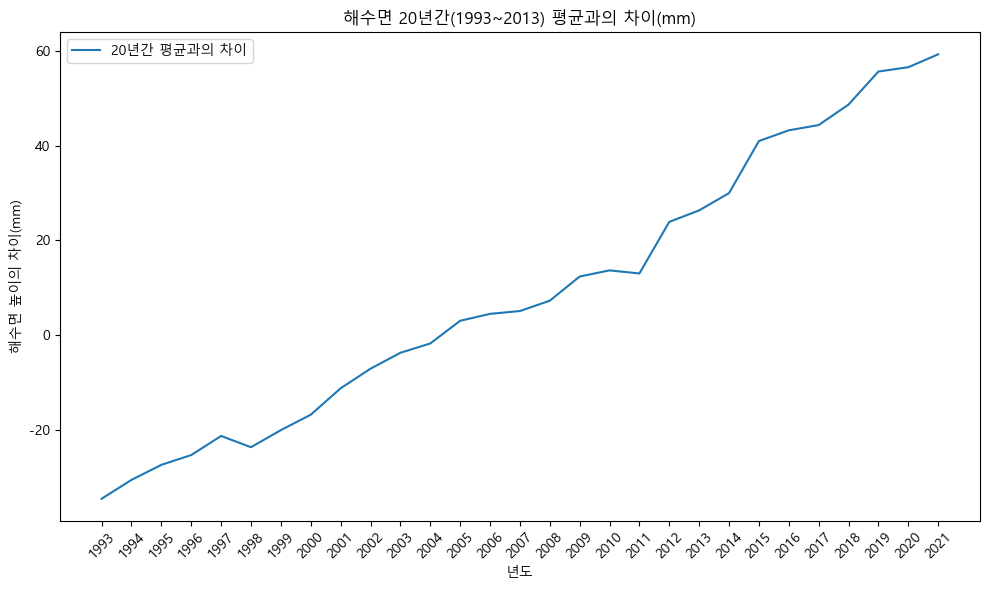

In [ ]:
# 해수면 차이 라인 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data = sea_difference)

# 그래프 꾸미기
plt.title('해수면 20년간(1993~2013) 평균과의 차이(mm)')
plt.xlabel('년도')
plt.xticks(sea_difference.index)
plt.yticks([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])
plt.ylabel('해수면 높이의 차이(mm)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전

# 그래프 표시
plt.tight_layout()
plt.show()